In [1]:
import hopsworks

project = hopsworks.login() 

fs = project.get_feature_store() 

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/5419
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import tensorflow as tf

#import os
#import warnings
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector,Bidirectional
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [3]:
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
feature_view = fs.get_feature_view(
    name = 'air_quality_fv',
    version = 1
)

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = feature_view.get_train_validation_test_split(training_dataset_version=4)

In [8]:
X_train.to_csv('X_train.csv')


In [9]:
X_test.to_csv('X_test.csv')
X_val.to_csv('X_val.csv')


In [6]:
np.save('X_train.npy',X_train)

In [7]:
np.save('X_test.npy',X_test)
np.save('X_val.npy',X_val)
np.save('y_train.npy',y_train)
np.save('y_test.npy',y_test)
np.save('y_val.npy',y_val)

In [54]:
i,j,k=X_train, X_val, X_test

In [56]:
X_train = X_train.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)


In [57]:
X_val = X_val.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)


In [58]:
X_test = X_test.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)



In [59]:
X_train["aqi_next_day"] = X_train['aqi'].shift(1)
X_val["aqi_next_day"] = X_val['aqi'].shift(1)
X_test["aqi_next_day"] = X_test['aqi'].shift(1)

In [60]:
X_train = X_train.drop(columns=["date"]).fillna(0)
y_train = X_train.pop("aqi_next_day")

In [61]:
X_val = X_val.drop(columns=["date"]).fillna(0)
y_val = X_val.pop("aqi_next_day")

In [62]:
X_test = X_test.drop(columns=["date"]).fillna(0)
y_test = X_test.pop("aqi_next_day")

In [63]:
X_train[X_train.isna().any(axis=1)]

,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,temp,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions


In [64]:
X_val[X_val.isna().any(axis=1)]

,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,temp,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions


In [65]:
X_test[X_test.isna().any(axis=1)]

,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,temp,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions


In [66]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [81]:
print('mean_absolute_error training: ', mean_absolute_error(y_train, gb.predict(X_train)))
print('mean_absolute_error testing : ', mean_absolute_error(y_test, gb.predict(X_test)))
print('mean_absolute_error validation: ', mean_absolute_error(y_val, gb.predict(X_val)))

mean_absolute_error training:  11.548652457460609
mean_absolute_error testing :  15.751024448587
mean_absolute_error validation:  16.266101056551353


In [86]:
print('root mean_squared_error training: ', mean_squared_error(y_train, gb.predict(X_train), squared=False))
print('root mean_squared_error testing : ', mean_squared_error(y_test, gb.predict(X_test), squared=False))
print('root mean_squared_error validation: ', mean_squared_error(y_val, gb.predict(X_val), squared=False))

root mean_squared_error training:  15.819418114170666
root mean_squared_error testing :  21.495621800677302
root mean_squared_error validation:  21.99227515031484


In [90]:
y_train.iloc[4:10].values

array([36., 33.,  9.,  9., 60., 58.])

In [5]:
X_train

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1515279600000,-0.532729,-0.809162,-0.715625,-0.873710,-0.444202,0.348340,34,-1.585277,-1.448301,...,0.371375,0.626569,-1.500504,1.076506,-1.379511,-0.070776,-0.899876,-0.902254,-0.934410,1
1,1555192800000,0.506534,0.460144,0.278439,0.379906,-0.444202,1.016424,64,-0.620217,-1.304209,...,-0.237814,-0.277285,-1.459160,1.096930,-1.455272,0.457024,0.482606,0.476382,0.900146,5
2,1555365600000,0.610460,0.369479,0.112762,1.758883,-0.444202,1.684508,67,0.389384,-0.241532,...,0.022289,-0.096514,-1.295962,0.177833,-0.565079,1.157167,0.716857,0.742841,0.900146,1
3,1597528800000,0.714386,0.188150,0.609794,0.003821,-0.444202,1.016424,70,2.171033,1.847801,...,0.590409,0.044086,-1.412377,-0.455324,0.889535,-0.167719,2.274526,2.248914,1.267057,2
4,1609369200000,0.749028,7.078666,-1.212657,0.755990,-0.444202,3.020676,71,-1.377418,-1.394267,...,-0.737487,-0.899940,0.066202,-1.313148,0.294810,-0.835547,-0.807778,-0.786402,-0.934410,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,1648677600000,-0.636655,-0.990491,0.526955,-0.999071,-0.444202,-0.319745,32,-1.481347,-1.268186,...,1.226978,1.028282,-1.821461,-1.353997,1.222884,-0.103090,-0.785754,-0.763232,-0.567499,3
1538,1408312800000,-1.710560,-0.537168,0.029923,0.254544,-0.444202,-1.655913,26,0.463620,0.659043,...,0.501427,1.339610,0.765780,-1.057843,-0.924944,-0.544719,0.760904,0.777597,0.533235,2
1539,1468792800000,0.610460,1.004132,3.343470,1.758883,1.145032,1.016424,67,1.488068,1.163365,...,-0.929142,-0.909983,1.174865,0.627169,-1.697708,0.338539,2.000232,1.970870,1.633968,6
1540,1561500000000,0.818313,-0.537168,0.361278,-1.249795,-0.444202,-0.319745,73,1.102044,1.559618,...,-0.313107,-0.237114,1.744972,0.953960,-0.519622,-0.372376,0.583714,0.615404,1.267057,1


In [5]:
training=pd.read_csv('X_train.csv')
testing=pd.read_csv('X_test.csv')
val=pd.read_csv('X_val.csv')

In [6]:
training = training.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)
testing = testing.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)
val = val.sort_values(by=["date"], ascending=[False]).reset_index(drop=True)

In [7]:
training.head(10)

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1197,1672700400000,-0.186308,-2.259797,-2.123882,-2.754133,-0.444202,-1.655913,44,-0.932005,...,1.350185,0.024000,-0.085028,0.810989,-0.076420,-1.040204,-1.247249,-1.261394,-1.668232,2
1,349,1672527600000,0.610460,-0.809162,-0.052916,-0.748348,-0.444202,-0.319745,67,0.092443,...,1.719806,2.132993,0.231577,-0.577870,-0.224154,-1.040204,-1.128121,-1.122372,-1.301321,2
2,1173,1672441200000,-0.428803,1.094797,0.112762,-1.249795,-0.444202,-0.987829,37,0.107290,...,2.780754,2.313764,0.296856,-1.343785,0.446332,-1.115604,-1.273277,-1.284565,-1.668232,2
3,663,1672354800000,-0.463445,-0.809162,0.029923,-1.375156,-0.444202,-0.987829,36,-0.352969,...,1.843013,1.831709,0.034651,-1.353997,-0.262034,-1.126376,-1.248250,-1.249809,-1.668232,2
4,291,1672268400000,-0.567371,-0.718497,0.029923,-1.249795,-0.444202,-0.987829,33,-0.486593,...,1.596599,1.570595,0.302296,-1.517392,1.044845,0.209281,-1.217217,-1.215054,-1.301321,4
5,627,1672182000000,-0.532729,-0.899826,0.112762,-1.625879,-0.444202,-0.987829,9,-0.516287,...,1.637668,1.660980,0.121690,-0.894448,1.310010,0.004624,-1.263266,-1.249809,-1.668232,4
6,317,1672095600000,-0.740581,-1.171821,-0.301432,-1.625879,-0.444202,-0.319745,9,-1.035935,...,0.590409,0.988111,0.294680,0.555684,0.381935,1.081767,-1.032018,-1.029691,-0.567499,2
7,302,1671922800000,0.367965,-0.899826,0.112762,-1.500518,-0.444202,-0.987829,60,-0.738993,...,-0.840159,-0.899940,-0.190563,-0.475748,1.260765,-1.417204,-1.264267,-1.261394,-1.668232,4
8,62,1671836400000,0.298681,-0.174509,-0.964141,-0.246902,-0.444202,0.348340,58,-0.590523,...,1.055858,1.078497,0.439383,-0.557446,0.828926,-1.050976,-1.184181,-1.191883,-1.301321,2
9,1381,1671663600000,0.471892,-0.718497,-0.384270,0.254544,-0.444202,0.348340,63,-0.679605,...,-0.299418,-0.106557,0.220697,-1.241663,0.813774,-1.363347,-1.048035,-1.052861,-0.934410,2


In [8]:
def give_y(df):
    y=[]
    for i in range(7,len(df)):
        next7days=np.flip(df['aqi'].iloc[i-7:i])
        y.append(next7days)
    return y

y_train=np.array(give_y(training))
y_test=np.array(give_y(testing))
y_val=np.array(give_y(val))

In [9]:
X_train=training.iloc[7:,2:]
X_train.fillna(X_train.mean(),inplace=True)
X_train=np.reshape(np.array(X_train),(len(X_train),1,len(X_train.columns)))

X_test=testing.iloc[7:,2:]
X_test.fillna(X_test.mean(),inplace=True)
X_test=np.reshape(np.array(X_test),(len(X_test),1,len(X_test.columns)))

X_val=val.iloc[7:,2:]
X_val.fillna(X_val.mean(),inplace=True)
X_val=np.reshape(np.array(X_val),(len(X_val),1,len(X_val.columns)))

In [10]:
# define model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(1, 28)))
model.add(LSTM(128,dropout=0.5))
model.add(Dense(7))

opt=RMSprop(lr=0.01)
model.compile(optimizer=opt, loss='mse')

In [14]:
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=100, verbose=1)

Epoch 1/100
48/48 [==============================] - 4s 22ms/step - loss: 952.0828 - val_loss: 557.3653
Epoch 2/100
48/48 [==============================] - 0s 8ms/step - loss: 482.1422 - val_loss: 510.1601
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 457.5989 - val_loss: 513.2217
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 449.6489 - val_loss: 499.5789
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 445.2910 - val_loss: 502.7179
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 443.2769 - val_loss: 498.4206
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 438.9772 - val_loss: 503.6880
Epoch 8/100
48/48 [==============================] - 1s 11ms/step - loss: 438.0992 - val_loss: 499.5209
Epoch 9/100
48/48 [==============================] - 1s 10ms/step - loss: 437.3380 - val_loss: 495.4371
Epoch 10/100
48/48 [==============================] - 1s 14ms/step - l

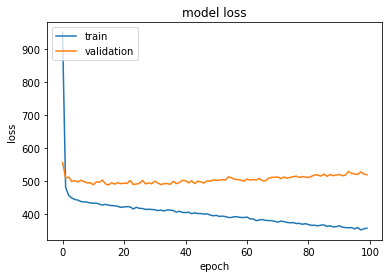

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, verbose=1)

Epoch 1/20
48/48 [==============================] - 4s 24ms/step - loss: 970.6830 - val_loss: 556.4267
Epoch 2/20
48/48 [==============================] - 0s 8ms/step - loss: 483.4117 - val_loss: 510.3499
Epoch 3/20
48/48 [==============================] - 0s 7ms/step - loss: 457.8203 - val_loss: 502.6936
Epoch 4/20
48/48 [==============================] - 0s 7ms/step - loss: 450.3755 - val_loss: 507.5117
Epoch 5/20
48/48 [==============================] - 0s 7ms/step - loss: 447.5017 - val_loss: 499.0786
Epoch 6/20
48/48 [==============================] - 0s 8ms/step - loss: 442.8739 - val_loss: 495.3546
Epoch 7/20
48/48 [==============================] - 0s 8ms/step - loss: 440.0240 - val_loss: 500.3824
Epoch 8/20
48/48 [==============================] - 0s 8ms/step - loss: 439.5208 - val_loss: 496.3983
Epoch 9/20
48/48 [==============================] - 0s 8ms/step - loss: 438.1268 - val_loss: 497.3081
Epoch 10/20
48/48 [==============================] - 0s 8ms/step - loss: 436.2890

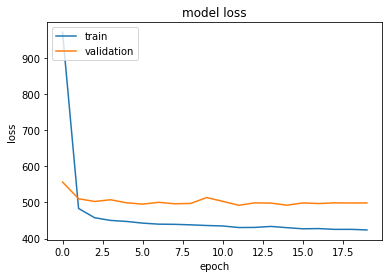

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
print('root mean_squared_error testing : ', mean_squared_error(y_test, model.predict(X_test), squared=False))

20/20 [==============================] - 1s 2ms/step
root mean_squared_error testing :  21.240189533431618


20/20 [==============================] - 0s 2ms/step


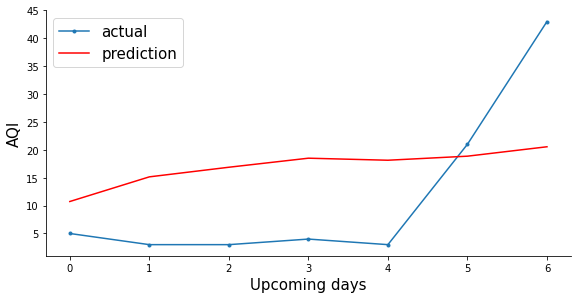

In [21]:
test_predict=model.predict(X_test)

idx = 7
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[77], marker='.', label="actual")
plt.plot(aa, test_predict[77], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('AQI', size=15)
plt.xlabel('Upcoming days', size=15)
plt.legend(fontsize=15)
plt.show();

In [22]:
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.


In [23]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

model_schema.to_dict()

{'input_schema': {'tensor_schema': {'shape': '(1535, 1, 28)',
   'type': 'float64'}},
 'output_schema': {'tensor_schema': {'shape': '(1535, 7)', 'type': 'int64'}}}

In [25]:
import joblib

joblib.dump(model, 'model.pkl')

2023-01-12 17:43:56,835 WARNING: Found untraced functions such as lstm_cell_4_layer_call_fn, lstm_cell_4_layer_call_and_return_conditional_losses, lstm_cell_5_layer_call_fn, lstm_cell_5_layer_call_and_return_conditional_losses while saving (showing 4 of 4). These functions will not be directly callable after loading.
2023-01-12 17:43:57,863 INFO: Assets written to: ram://d5f3de6a-efda-43a1-99d1-22e2511505b9/assets


['model.pkl']

In [27]:
model = mr.sklearn.create_model(
    name="LSTM_model",
    metrics={"rmse": "21.27"},
    description="LSTM model",
    input_example=None,
    model_schema=model_schema
)

model.save('model.pkl')

  0%|          | 0/6 [00:00<?, ?it/s]

Model created, explore it at https://c.app.hopsworks.ai:443/p/5419/models/LSTM_model/1


Model(name: 'LSTM_model', version: 1)

In [22]:
feature_view.init_batch_scoring(training_dataset_version=4)


In [112]:


start_date = datetime.now() - timedelta(days=2)
start_time = int(start_date.timestamp()) * 1000

X = feature_view.get_batch_data(start_time=start_time)

2023-01-13 03:10:23,519 INFO: USE `lab1xtitanic_featurestore`
2023-01-13 03:10:24,050 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg1`.`date` `date`, `fg1`.`pm25` `pm25`, `fg1`.`pm10` `pm10`, `fg1`.`o3` `o3`, `fg1`.`no2` `no2`, `fg1`.`so2` `so2`, `fg1`.`co` `co`, `fg1`.`aqi` `aqi`, `fg1`.`date` `join_pk_date`, `fg1`.`date` `join_evt_date`, `fg0`.`tempmax` `tempmax`, `fg0`.`tempmin` `tempmin`, `fg0`.`temp` `temp`, `fg0`.`feelslikemax` `feelslikemax`, `fg0`.`feelslikemin` `feelslikemin`, `fg0`.`feelslike` `feelslike`, `fg0`.`dew` `dew`, `fg0`.`humidity` `humidity`, `fg0`.`precip` `precip`, `fg0`.`precipprob` `precipprob`, `fg0`.`precipcover` `precipcover`, `fg0`.`windgust` `windgust`, `fg0`.`windspeed` `windspeed`, `fg0`.`winddir` `winddir`, `fg0`.`sealevelpressure` `sealevelpressure`, `fg0`.`cloudcover` `cloudcover`, `fg0`.`visibility` `visibility`, `fg0`.`solarradiation` `solarradiation`, `fg0`.`solarenergy` `solarenergy`, `fg0`.`uvindex` `uvindex`, `fg0`.`conditions` `conditions`,

In [113]:
X

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1673478000000,-1.294855,-1.897138,-0.0612,-2.265223,-0.285279,-0.052511,25,-0.352969,0.208756,...,2.73284,2.474449,0.425239,-1.333573,0.878171,-0.846319,-1.244246,-1.249809,-1.301321,2


In [102]:
X.loc[X['date'] == max (X['date'])]

2023-01-13 00:40:59,001 INFO: NumExpr defaulting to 8 threads.


,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1673478000000,-1.294855,-1.897138,-0.044632,-2.265223,-0.285279,0.014298,25,-0.352969,0.208756,...,2.73284,2.474449,0.425239,-1.333573,0.878171,-0.846319,-1.244246,-1.249809,-1.301321,2


In [65]:
import time
latest_date_unix = str(X.date.values[0])[:10]
latest_date = time.ctime(int(latest_date_unix))

In [78]:
temp=time.ctime(1673478000+(3600*24))

In [85]:
temp[4:-14]

'Jan 13'

In [72]:
latest_date_unix

'1673478000'

In [71]:
latest_date

'Thu May 29 10:00:00 55000'

In [90]:
days=list()
temp_sec=int(latest_date_unix)
for i in range(0,7):
    temp_sec=temp_sec+(3600*24)

    days.append(time.ctime(temp_sec)[4:-14])

In [91]:
days

['Jan 13', 'Jan 14', 'Jan 15', 'Jan 16', 'Jan 17', 'Jan 18', 'Jan 19']

In [49]:
X = X.drop(columns=["date"]).fillna(0)

In [38]:
from functions import decode_features, get_model
data_to_display = decode_features(X, feature_view=feature_view)

In [39]:
data_to_display

,date,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,1673478000000,12.0,4.0,25.1,3.9,0.1,2.5,25,11.9,9.0,...,79.6,50.7,231.9,1002.4,88.0,11.6,7.7,0.6,1.0,"Rain, Partially cloudy"


In [ ]:
#data_to_display = data_to_display.set_index("city")

In [45]:
model = get_model(project=project,
                  model_name="LSTM_model",
                  evaluation_metric="mse",
                  sort_metrics_by="min")

In [50]:
X

,pm25,pm10,o3,no2,so2,co,aqi,tempmax,tempmin,temp,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,-1.294855,-1.897138,-0.044632,-2.265223,-0.285279,0.014298,25,-0.352969,0.208756,-0.096937,...,2.73284,2.474449,0.425239,-1.333573,0.878171,-0.846319,-1.244246,-1.249809,-1.301321,2


In [52]:
X=np.reshape(np.array(X),(len(X),1,len(X.columns)))

In [53]:
preds = model.predict(X)

1/1 [==============================] - 0s 20ms/step


In [54]:
preds

array([[33.2088  , 38.52175 , 42.567642, 44.45889 , 42.770912, 43.79951 ,
        45.145107]], dtype=float32)

In [ ]:
import requests

In [ ]:
requests.get(f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city.lower()}/{date}?unitGroup=metric&include=days&key={WEATHER_API_KEY}&contentType=json').json()


In [107]:
start_date = datetime.now() - timedelta(days=2)

In [108]:
start_date

datetime.datetime(2023, 1, 11, 2, 54, 30, 786046)